In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

In [2]:
def retr_s2nr(timeexpo):
    '''
    Roman F087 SNR at 23 AB magnitude
    https://roman.gsfc.nasa.gov/science/apttables2021/table-signaltonoise.html
    '''
    s2nr = 21. * np.sqrt(timeexpo / 55.)

    return s2nr

In [4]:
area = np.linspace(1., 3000., 100)
timeexpo = np.linspace(100., 110000., 50)

areamesh, timeexpomesh = np.meshgrid(area, timeexpo)

s2nr = retr_s2nr(timeexpo)
s2nrmesh = retr_s2nr(timeexpomesh)

areadhls = 100.
areahlws = 1700.

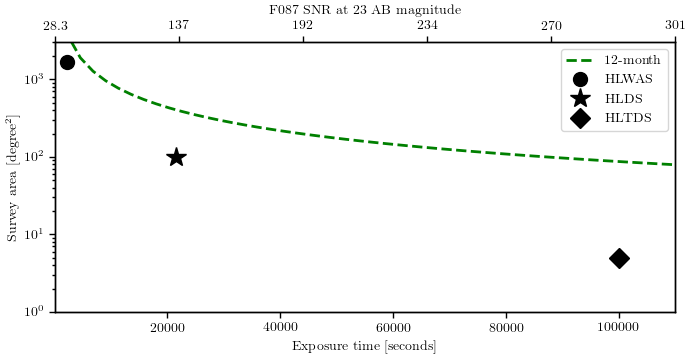

In [5]:
# path = pathvisu + 'AreaExposure.png'

figr, axis = plt.subplots(figsize=(8, 3.5))
listlsty = ['--', '-', '-.']
listmonttotl = np.array([12.])  # [month]
listnumbexpo = np.array([3., 13.])  # [month]
numbmonttotl = len(listmonttotl)
indxmonttotl = np.arange(numbmonttotl)
for k in indxmonttotl:
    labl = '%d-month' % listmonttotl[k]
    timetotl = listmonttotl[k] * 30. * 24. * 3600.  # [sec]
    areacove = 0.28 * timetotl / timeexpo  # / 2.# / listnumbexpo[k]
    axis.plot(timeexpo, areacove, color='green', ls=listlsty[k], label=labl)
axis.set_xlim([min(timeexpo), max(timeexpo)])
axis.set_ylim([min(area), max(area)])
axis.set_yscale('log')
axis.plot(2250, areahlws, ls='', color='k', marker='o', ms=10, label='HLWAS')
axis.plot(21600, 100, ls='', color='k', marker='*', ms=15, label='HLDS')
axis.plot(1e5, 5., ls='', color='k', marker='D', ms=10, label='HLTDS')

axis.legend()

axistwin = axis.twiny()
listlabl = []
for s2nrtemp in s2nr:
    listlabl.append('%.3g' % s2nrtemp)
axistwin.set_xticklabels(listlabl)
axistwin.set_xlabel('F087 SNR at 23 AB magnitude')
#figr.colorbar(c, ax=axis)
axis.set_xlabel('Exposure time [seconds]')
axis.set_ylabel('Survey area [degree$^2$]')
# print('Writing to %s...' % path)
#plt.subplots_adjust(top=0.9, right=0.8)#tight_layout()
# plt.savefig(path)
plt.show()